# METODOLOGIA BASEADA EM CIÊNCIA DE REDES PARA ANÁLISE DE COMUNIDADES EM REDES SOCIAIS COM GEOLOCALIZAÇÃO

## Autor: ERIC LEAL

### Detalhes do Projeto
Em desenvolvimento...



## Importando as bibliotecas

In [1]:
import pandas as pd
import numpy as np
import json
import random
from community_layout.layout_class import CommunityLayout
from community import community_louvain
from matplotlib.colors import CSS4_COLORS
import graphviz as gv
import pygraphviz as pgv

from pandas import json_normalize
import networkx as nx
from networkx.drawing.nx_agraph import to_agraph
from networkx.drawing.nx_pydot import to_pydot


import matplotlib.pyplot as plt
import utm
import math
import csv
import geopandas as gpd
from libpysal.weights import Rook

from tqdm.contrib.concurrent import thread_map

import tweepy
import os
from dotenv import load_dotenv
from shapely import geometry

# Required Libraries
from tqdm import tqdm as tqdmBasic

from sklearn.cluster import KMeans
from sklearn.cluster import AgglomerativeClustering
from sklearn.cluster import DBSCAN
from sklearn.cluster import AffinityPropagation

import seaborn as sns; sns.set_theme()


COMMUNITY LAYOUT: Datashader not found, edge bundling not available


## Configurando a API

In [18]:
# Load the .env file
# load_dotenv()

# # Get the keys from the .env file
# consumer_key = os.environ.get('TWITTER_API_KEY')
# consumer_secret = os.environ.get('TWITTER_API_KEY_SECRET')
# access_token = os.environ.get('TWITTER_ACCESS_TOKEN')
# access_token_secret = os.environ.get('TWITTER_ACCESS_TOKEN_SECRET')
# bearer_token = os.environ.get('TWITTER_BEARER_TOKEN')

# # Authenticate with the twitter API
# auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
# auth.set_access_token(access_token, access_token_secret)

# # Create the API object
# api = tweepy.API(auth, wait_on_rate_limit=True)

## Carregando dados existententes caso existam

In [4]:
# Dicionario a ser preenchido com chaves sendo o author_id e os valores sendo o username
if os.path.exists(r'E://Dict_Author_Id_to_Username.json'):
    with open(r'E://Dict_Author_Id_to_Username.json', 'r') as fp:
        author_id_to_username = json.load(fp)
        print(f"Foram carregadas {len(author_id_to_username)} chaves do arquivo JSON")
else:
    author_id_to_username = {}

Foram carregadas 181528 chaves do arquivo JSON


In [2]:
df_mean = pd.read_csv(r"E:/DataFrameUsernameMeansMedians.csv", sep=";", header=None)
df_mean.columns = ["username", "mean_lat", "mean_lon", "median_lat", "median_lon", "mean_X", "mean_Y", "median_X", "median_Y"]
df_mean.head()

C:\Users\Cliente\AppData\Local\Temp\ipykernel_15232\2368035411.py:1: DtypeWarning: Columns (1,2,3,4,5,6,7,8) have mixed types. Specify dtype option on import or set low_memory=False.
  df_mean = pd.read_csv(r"E:/DataFrameUsernameMeansMedians.csv", sep=";", header=None)


,username,mean_lat,mean_lon,median_lat,median_lon,mean_X,mean_Y,median_X,median_Y
0,username,mean_lat,mean_lon,median_lat,median_lon,mean_X,mean_Y,median_X,median_Y
1,Manuela_Lagoa,38.7,-9.18333333,38.7,-9.18333333,484058.0201695964,4283502.065548434,484058.0201695964,4283502.065548434
2,oblogdoedinho,38.72556305044776,-9.150001534925371,38.72556305,-9.15000153,486961.0744357934,4286333.415443861,486961.0748638524,4286333.415393474
3,noventaradio,38.86226743322353,-9.065096915696257,38.86485962,-9.06072863,494352.23164528405,4301494.446264396,494731.4127623029,4301781.836199852
4,object82,38.75138141069397,-9.188555476450512,38.7167,-9.1569,483615.65982184716,4289204.575585471,486359.7383995273,4285350.924191058


In [3]:
df_mean = df_mean.drop(0)
df_mean.head()

,username,mean_lat,mean_lon,median_lat,median_lon,mean_X,mean_Y,median_X,median_Y
1,Manuela_Lagoa,38.7,-9.18333333,38.7,-9.18333333,484058.0201695964,4283502.065548434,484058.0201695964,4283502.065548434
2,oblogdoedinho,38.72556305044776,-9.150001534925371,38.72556305,-9.15000153,486961.0744357934,4286333.415443861,486961.0748638524,4286333.415393474
3,noventaradio,38.86226743322353,-9.065096915696257,38.86485962,-9.06072863,494352.23164528405,4301494.446264396,494731.4127623029,4301781.836199852
4,object82,38.75138141069397,-9.188555476450512,38.7167,-9.1569,483615.65982184716,4289204.575585471,486359.7383995273,4285350.924191058
5,Itsmarsousa,38.650378758920446,-9.074262791420454,38.66137,-9.07744,493537.9279843213,4277982.518656515,493262.48875507596,4279202.385287764


In [4]:
username_to_find = ""
is_equal = df_mean['username'] == username_to_find

In [7]:
print(df_mean[df_mean['username'] == username_to_find])

Empty DataFrame
Columns: [username, mean_lat, mean_lon, median_lat, median_lon, mean_X, mean_Y, median_X, median_Y]
Index: []


In [21]:
dfTopAuthorsProjected = pd.read_csv("E://TopAuthorsProjected.csv")

In [5]:
with open(r'E:/dictMentions_locations.json', 'r') as f:
    dictMentions = json.load(f)

In [7]:
for k, v in dictMentions.items():
    if "" in v:
        print(k, v)

In [4]:
grafo_twitter = nx.read_graphml("D:\\Documentos\\data_and_code\\all_data_lisbon\\grafo_twitter.graphml")
grafo_twitter_conexo = nx.read_graphml("D:\\Documentos\\data_and_code\\all_data_lisbon\\grafo_twitter_conexo.graphml")

grafo_fluxo_secao = nx.read_graphml("D:\\Documentos\\data_and_code\\all_data_lisbon\\grafo_fluxo_secao.graphml")
grafo_fluxo_freguesia = nx.read_graphml("D:\\Documentos\\data_and_code\\all_data_lisbon\\grafo_fluxo_freguesia.graphml")
grafo_fluxo_municipio = nx.read_graphml("D:\\Documentos\\data_and_code\\all_data_lisbon\\grafo_fluxo_municipio.graphml")

grafo_regioes_secao = nx.read_graphml("D:\\Documentos\\data_and_code\\all_data_lisbon\\grafo_regioes_secao.graphml")  
grafo_regioes_freguesia = nx.read_graphml("D:\\Documentos\\data_and_code\\all_data_lisbon\\grafo_regioes_freguesia.graphml")
grafo_regioes_municipio = nx.read_graphml("D:\\Documentos\\data_and_code\\all_data_lisbon\\grafo_regioes_municipio.graphml")

In [5]:
grafo_twitter.number_of_nodes(), grafo_twitter.number_of_edges()

(196916, 142355)

In [10]:
grafo_twitter_copy = grafo_twitter.copy()

for node in grafo_twitter.nodes():
    if node == "" or node == " " or node is None:
        grafo_twitter_copy.remove_node(node)

In [17]:
nx.write_graphml_lxml(grafo_twitter_copy, "D:\\Documentos\\data_and_code\\all_data_lisbon\\grafo_twitter.graphml")

In [6]:
gdf_wgs84_secao = gpd.read_file(r"C:\Users\Cliente\OneDrive\UNIRIO\TCC\GPK\Seccao_Area_de_Interesse.shp")
gdf_wgs84_freguesia = gpd.read_file(r"C:\Users\Cliente\OneDrive\UNIRIO\TCC\GPK\Freguesia_Area_de_Interesse.shp")
gdf_wgs84_municipio = gpd.read_file(r"C:\Users\Cliente\OneDrive\UNIRIO\TCC\GPK\Municipio_Area_de_Interesse.shp")

crs = "EPSG:4326"

gdf_wgs84_secao = gdf_wgs84_secao.to_crs(crs)
gdf_wgs84_freguesia = gdf_wgs84_freguesia.to_crs(crs)
gdf_wgs84_municipio = gdf_wgs84_municipio.to_crs(crs)

In [32]:
gdf_users = gpd.read_file(r"E:\Usernames_Com_Coordenadas_Localidade.csv")
gdf_users['geometry'] = gdf_users.apply(lambda x: geometry.Point(x['median_lon'], x['median_lat']), axis=1)

## Carregando métodos

In [5]:
def community_layout(g, partition):
    """
    Compute the layout for a modular graph.


    Arguments:
    ----------
    g -- networkx.Graph or networkx.DiGraph instance
        graph to plot

    partition -- dict mapping int node -> int community
        graph partitions


    Returns:
    --------
    pos -- dict mapping int node -> (float x, float y)
        node positions

    """

    pos_communities = _position_communities(g, partition, scale=3.)

    pos_nodes = _position_nodes(g, partition, scale=1.)

    # combine positions
    pos = dict()
    for node in g.nodes():
        pos[node] = pos_communities[node] + pos_nodes[node]

    return pos

def _position_communities(g, partition, **kwargs):

    # create a weighted graph, in which each node corresponds to a community,
    # and each edge weight to the number of edges between communities
    between_community_edges = _find_between_community_edges(g, partition)

    communities = set(partition.values())
    hypergraph = nx.DiGraph()
    hypergraph.add_nodes_from(communities)
    for (ci, cj), edges in between_community_edges.items():
        hypergraph.add_edge(ci, cj, weight=len(edges))

    # find layout for communities
    pos_communities = nx.spring_layout(hypergraph, **kwargs)

    # set node positions to position of community
    pos = dict()
    for node, community in partition.items():
        pos[node] = pos_communities[community]

    return pos

def _find_between_community_edges(g, partition):

    edges = dict()

    for (ni, nj) in g.edges():
        ci = partition[ni]
        cj = partition[nj]

        if ci != cj:
            try:
                edges[(ci, cj)] += [(ni, nj)]
            except KeyError:
                edges[(ci, cj)] = [(ni, nj)]

    return edges

def _position_nodes(g, partition, **kwargs):
    """
    Positions nodes within communities.
    """

    communities = dict()
    for node, community in partition.items():
        try:
            communities[community] += [node]
        except KeyError:
            communities[community] = [node]

    pos = dict()
    for ci, nodes in communities.items():
        subgraph = g.subgraph(nodes)
        pos_subgraph = nx.spring_layout(subgraph, **kwargs)
        pos.update(pos_subgraph)

    return pos

In [25]:
def load_jsonl(input_path) -> list:
    """
    Read list of objects from a JSON lines file.
    """
    data = []
    with open(input_path, 'r', encoding='utf-8') as f:
        for line in f:
            data.append(json.loads(line.rstrip('\n|\r')))
    print('Loaded {} records from {}'.format(len(data), input_path))
    return data

In [26]:
def dataframe_standartization(data_frame: pd.DataFrame, columns: list = []) -> pd.DataFrame:
    data_frame.drop(columns=columns, inplace=True)
    data_frame = data_frame.fillna(0)
    
    dictCoordByUser = {}

    for index, row in tqdmBasic(data_frame.iterrows(), total=data_frame.shape[0]):
        if row['username'] not in dictCoordByUser:
            dictCoordByUser[row['username']] = {
                'lat': [],
                'lon': []
            }        
            
        dictCoordByUser[row['username']]['lat'].append(row['lat'])
        dictCoordByUser[row['username']]['lon'].append(row['lon'])
        
    df_mean = pd.DataFrame(columns=["username", "mean_lat", "mean_lon", "median_lat", "median_lon"])

    for key in tqdmBasic(dictCoordByUser.keys()):
        df_mean = df_mean._append({
            "username": key,
            "mean_lat": np.mean(dictCoordByUser[key]['lat']),
            "mean_lon": np.mean(dictCoordByUser[key]['lon']),
            "median_lat": np.median(dictCoordByUser[key]['lat']),
            "median_lon": np.median(dictCoordByUser[key]['lon'])
        }, ignore_index=True)
        
    return df_mean

In [27]:
def gera_dict_mentions_by_user(data_frame: pd.DataFrame, data_frame2:pd.DataFrame = None,  mentions_unicas = True) -> dict:
    if data_frame2 is not None:
        mentions_usuario = {}
        
        for index, row in tqdmBasic(data_frame2.iterrows(), total=data_frame2.shape[0]):
            if row['username'] not in mentions_usuario:
                mentions_usuario[row['username']] = [row_base[0]['username'] for row_base in data_frame[data_frame['username'] == row['username']]['entities_mentions'].tolist() 
                                                     if row_base is not None]    
    else:
        data_editado = data_frame['entities_mentions']
        data_editado.dropna(inplace=True)
        # dataEditado.reset_index(drop=True, inplace=True)
        data_editado = data_editado.to_frame()
        
        mentions_usuario = {}

        # Percorrendo teste1 e adicionando os usernames no dicionário usando o id do usuário como chave
            
        for mention in tqdmBasic(data_editado.itertuples(), total=data_editado.shape[0]):
            usuarios_mencionados = []
            
            coluna = 'author_id' #'username' if data_frame['username'].at[mention.Index] != '' else 'author_id'
            
            if data_frame[coluna].at[mention.Index] not in mentions_usuario:
                mentions_usuario[data_frame[coluna].at[mention.Index]] = []
                
            for usuario in mention[1]:
                usuarios_mencionados.append(usuario['username'])
                mentions_usuario[data_frame[coluna].at[mention.Index]].extend(usuarios_mencionados)
        
    if mentions_unicas:
        mentions_usuario = {k: list(dict.fromkeys(v)) for k, target in mentions_usuario.items()}
        
    return mentions_usuario

In [28]:
def geraDictLinkTweets(data_frame) -> list:
    dataEditado = data_frame['entities_urls']
    dataEditado.dropna(inplace=True)
    # dataEditado.reset_index(drop=True, inplace=True)
    dataEditado = dataEditado.to_frame()
    
    linksTweets = {}

    # Percorrendo teste1 e adicionando os usernames no dicionário usando o id do usuário como chave
        
    contador = 1
    for link in dataEditado.itertuples():
        print(f"Link {contador} de {dataEditado.shape[0]}")
        
        linksTweet = []
        if data_frame['author_id'].at[link.Index] not in linksTweets:
            linksTweets[data_frame['author_id'].at[link.Index]] = []
            
        for linkTweet in link[1]:
            linksTweet.append(linkTweet['expanded_url'])
            linksTweets[data_frame['author_id'].at[link.Index]].extend(linksTweet)
        contador += 1
        
    return linksTweets

In [29]:
def returnMediaDictListas(dict : dict) -> float:
    soma = 0
    for key in dict:
        soma += len(dict[key])
    return soma/len(dict)

In [30]:
def get_username(author_id: str):
    """Recupera o username do usuário a partir do author_id e atualiza o dicionário author_id_to_username

    Args:
        author_id: O id do usuário 
    """
    if author_id in author_id_to_username.keys():
        return
    
    author_id_to_username[author_id] = ''
    try:
        user = api.get_user(user_id=author_id)  
        author_id_to_username[author_id] = user.screen_name
    except:
        pass

In [31]:
def returnDataFrameWithUsernames(dataFrame : pd.DataFrame) -> pd.DataFrame:      
    dataFrame['username'] = ''
    
    thread_map(get_username, [id for id in dataFrame['author_id']], max_workers=16, total=dataFrame.shape[0])
        
    for index, row in dataFrame.iterrows():
        dataFrame['username'].at[index] = author_id_to_username[row['author_id']]
    
    return dataFrame

In [6]:
def degree_histogram_directed(G, in_degree=False, out_degree=False):
    """Return a list of the frequency of each degree value.

    Parameters
    ----------
    G : Networkx graph
       A graph
    in_degree : bool
    out_degree : bool

    Returns
    -------
    hist : list
       A list of frequencies of degrees.
       The degree values are the index in the list.

    Notes
    -----
    Note: the bins are width one, hence len(list) can be large
    (Order(number_of_edges))
    """
    nodes = G.nodes()
    if in_degree:
        in_degree = dict(G.in_degree())
        degseq=[in_degree.get(k,0) for k in nodes]
    elif out_degree:
        out_degree = dict(G.out_degree())
        degseq=[out_degree.get(k,0) for k in nodes]
    else:
        degseq=[target for k, target in G.degree()]
    dmax=max(degseq)+1
    freq= [ 0 for d in range(dmax) ]
    for d in degseq:
        freq[d] += 1
    return freq

In [34]:
def processRawData(data : dict | list[dict]) -> pd.DataFrame:
    data_frame = json_normalize(data,record_path = ['data'], sep = '_', errors ='ignore')
        
    data_frame['lat'] = data_frame['geo_coordinates_coordinates'].str.get(1)
    data_frame['lon'] = data_frame['geo_coordinates_coordinates'].str.get(0)

    #cleaning fields that will not be used
    try:
        # del data_frame['entities_mentions']
        del data_frame['context_annotations']
        # del data_frame['entities_urls']
        # del data_frame['entities_cashtags']
        del data_frame['withheld_copyright']
        del data_frame['withheld_country_codes']
        del data_frame['withheld_scope']
    except:
        pass
    
    return data_frame

In [35]:
def process_file(file: str) -> pd.DataFrame:
    """Processa um arquivo JSONL e retorna um dataframe

    Args:
        file (str): Caminho do arquivo JSONL

    Returns:
        pd.DataFrame: Dataframe com os dados do arquivo JSONL
    """
    print(f"Processando arquivo {file}")
    df = json_normalize(load_jsonl(file), sep='_', errors='ignore')
    return df

In [36]:
def convert_to_utm(df: pd.DataFrame, columnLat: str = "latitude", columnLon: str = "longitude", outColumnX: str = "x", outColumnY: str = "y") -> pd.DataFrame:
  """Converte as coordenadas de latitude e longitude para UTM zona 29.

  Args:
      df (pd.DataFrame): Dataframe com as coordenadas de latitude e longitude.
      columnLat (str, optional): Coluna que contém a latitude. Defaults to "latitude".
      columnLon (str, optional): Coluna que contém a longitude. Defaults to "longitude".
      outColumnX (str, optional): Coluna saída em UTM para o eixo X. Defaults to "x".
      outColumnY (str, optional): Coluna saída em UTM para o eixo Y. Defaults to "y".

  Returns:
      pd.DataFrame: Dataframe atualizado com as coordendas em UTM.
  """
  # Obtém as coordenadas de latitude e longitude.

  lat = df[columnLat].values
  lon = df[columnLon].values

  # Converte para UTM.

  easting, northing, zone_number, zone_letter = utm.from_latlon(lat, lon)

  # Adiciona as colunas `mean_X` e `mean_Y` ao dataframe.

  df[outColumnX] = easting
  df[outColumnY] = northing

  return df

In [37]:
def get_expanded_urls(row):
    """
    Retorna uma lista com as URLs expandidas do tweet.

    Args:
        row: Uma linha do dataframe.

    Returns:
        Uma lista com as URLs expandidas do tweet.
    """

    if row['entities_urls']:
        expanded_urls = [url['expanded_url'] for url in row['entities_urls']]
    else:
        expanded_urls = []
    return expanded_urls

In [38]:
def associateNodes(row):
    G = nx.DiGraph()
    vertex = row['username'] if row['username'] != '' else row['author_id']
    
    if vertex not in G.nodes():
        G.add_node(vertex)
        
    if row['entities_mentions']:
        for mention in row['entities_mentions']:
            mention_username = mention['username']
            if mention_username not in G.nodes():
                G.add_node(mention_username)
            G.add_edge(vertex, mention_username)
    
    return G

In [39]:
def calculateDistance(xP1: float, yP1: float, xP2: float, yP2: float):
    P1 = [xP1, yP1]
    P2 = [xP2, yP2]
    
    return math.dist(P1, P2)

In [40]:
def calculateDistances(graph, generalizationLimit = None):
  nodes_with_median = [node for node in graph.nodes if "median_X" in graph.nodes[node]]
  
  print(f"Existem {len(nodes_with_median)} nós com mediana.")
  
  distances = {}
  
  for node in tqdmBasic(nodes_with_median):
    for other_node in nodes_with_median:
        if node == other_node:
            continue
        
        # print(f"Calculando distância entre {node} e {other_node}")
        
        distance = calculateDistance(
            graph.nodes[node]["median_X"], graph.nodes[node]["median_Y"], graph.nodes[other_node]["median_X"], graph.nodes[other_node]["median_Y"]
        )
        if generalizationLimit is not None:
            generaralized_distance = int(distance//generalizationLimit)
            if generaralized_distance not in distances.keys():
                distances[generaralized_distance] = 1
            else:
                distances[generaralized_distance] += 1
        else:
            if distance not in distances.keys():
                distances[distance] = 1
            else:
                distances[distance] += 1
            
        # distancesFromNode[node].append(distance)
  
  
  return distances

In [42]:
def plotScatterEmpyricalComplementarDistribution(distances, output_path: str = 'E://', output_file_name: str = 'empyrical_complementar_distribution.png', show: bool = False, log: bool = False):
    """Plota o gráfico de dispersão da distribuição empírica complementar.

    Args:
        distances (list): Lista com as distâncias.
        output_path (str): Caminho de saída do arquivo.
        output_file_name (str): Nome do arquivo de saída.
        show (bool): Se o gráfico deve ser exibido.
    """    
    # sort the distances

    # calculate the probability of each distance
    if isinstance(distances, dict):
        keys_in_order = sorted(distances.keys())
        length_distances = sum(distances.values())
        dist = 1
        prob = []
        print(f"keys_in_order: {keys_in_order}")
        print(f"length_distances: {length_distances}")
        
        distances_list = [key for key, value in distances.items() for _ in tqdmBasic(range(value))]
        n = len(distances_list)
        prob = [1 - (i+1)/n for i in tqdmBasic(range(0,n))]
                    
        distances = list(distances.keys())
        
    else:
        distances.sort()
        if log == True:
            prob = [np.log10(1 - (i/len(distances))) for i in tqdmBasic(range(len(distances)), desc="Calculando probabilidade")]
        else:
            prob = [1 - (i/len(distances)) for i in tqdmBasic(range(len(distances)))]
            
    print(type(prob))

    # plot the scatter graph
    plt.figure(figsize=(180, 120))
    plt.scatter(distances, prob)
    plt.yticks(np.arange(0, 1.1, 0.1))
    plt.xlabel("Distância")
    plt.ylabel("Probabilidade")
    plt.savefig(f"{output_path}{output_file_name}", dpi=300, bbox_inches='tight')
    
    if show:
        plt.show()
       

### Métodos de geração de grafos

In [161]:
def generate_flow_graph(graph: nx.Graph, gdf: gpd.GeoDataFrame, column: str = 'geometry'):
    """Gera um grafo de fluxo a partir de um grafo existente e um GeoDataFrame com as regiões de interesse.

    Args:
        graph (nx.graph): Grafo base de onde será gerado o grafo de fluxo.
        gdf (gpd.GeoDataFrame): GeoDataFrame com os dados geográficos das regiões de interesse.
        column (str, optional): coluna alvo com o código de interesse. Defaults to 'geometry'.
        
    """
    
    grafo_fluxo = nx.DiGraph()
    no_sem_regiao = []
    
    for source, target in tqdmBasic(graph.edges(), total=graph.number_of_edges()):
        if source in no_sem_regiao and target in no_sem_regiao:
            continue
        
        u = graph.nodes[source]
        v = graph.nodes[target]
        
        try:
            u['median_lat']
        except:
            no_sem_regiao.append(source)
            continue
        
        try:
            v['median_lat']
        except:
            no_sem_regiao.append(target)
            continue
        
        u_region = gdf[gdf.contains(geometry.Point(float(u['median_lon']), float(u['median_lat'])))][column]
        v_region = gdf[gdf.contains(geometry.Point(float(v['median_lon']), float(v['median_lat'])))][column]
                
        if u_region.empty:
            no_sem_regiao.append(source)
            continue
        
        if v_region.empty:
            no_sem_regiao.append(target)
            continue
        
        if u_region.index[0] == v_region.index[0]:
            continue        
        
        if grafo_fluxo.has_edge(u_region.values[0], v_region.values[0]):
            grafo_fluxo[u_region.values[0]][v_region.values[0]]['weight'] += 1
        else:
            grafo_fluxo.add_edge(u_region.values[0], v_region.values[0], weight=1)
        
        # if (u_region.index[0], v_region.index[0]) not in grafo_fluxo.edges():
        #     grafo_fluxo.add_edge(u_region.index[0], v_region.index[0], weight=1)
        # else:
        #     grafo_fluxo[u_region.index[0]][v_region.index[0]]['weight'] += 1        
    
    return grafo_fluxo, no_sem_regiao

In [170]:
def generate_graph_from_gdf(gdf: gpd.GeoDataFrame, column: str = 'geometry') -> nx.Graph:
    """Gera um grafo a partir de um GeoDataFrame.

    Args:
        gdf (gpd.GeoDataFrame): GeoDataFrame com os dados.
        column (str, optional): Nome da coluna de referência. Defaults to 'geometry'.

    Returns:
        nx.Graph: Grafo gerado.
    """
    G = nx.Graph()

    for index, row in tqdmBasic(gdf.iterrows(), total=gdf.shape[0]):
        vertex = row[column]
        adjacent_regions = gdf[gdf.geometry.touches(row['geometry'])][column]
        
        for adjacent_region in adjacent_regions:
            G.add_edge(vertex, adjacent_region)
            
    return G

In [11]:
for node in grafo_twitter.nodes():
    print(grafo_twitter.nodes[node])
    break

{'median_lat': '38.59663575', 'median_lon': '-8.6511916'}


### Métodos de cálculos com a rede

In [21]:
for node in tqdmBasic(grafo_twitter_conexo.nodes(), total=grafo_twitter_conexo.number_of_nodes()):
    if 'median_lat' not in grafo_twitter_conexo.nodes[node]:
        continue
    
    x_median = df_mean.loc[df_mean['username'] == node, 'median_X'].values[0]
    y_median = df_mean.loc[df_mean['username'] == node, 'median_Y'].values[0]

    grafo_twitter_conexo.nodes[node]['median_X'] = x_median
    grafo_twitter_conexo.nodes[node]['median_Y'] = y_median

100%|██████████| 72800/72800 [03:30<00:00, 345.15it/s]


In [5]:
# import networkx as nx

# Assuming you have a graph object named 'graph'
# You can replace 'graph' with your actual graph object

# Get the first ten nodes
nodes = list(grafo_twitter_conexo.nodes())[:10]

# Print the nodes and their attributes
for node in nodes:
    attributes = grafo_twitter_conexo.nodes[node]
    print(f"Node: {node}")
    print(f"Attributes: {attributes}")
    print("--------------------")


Node: wellbeingworld
Attributes: {'median_lat': '38.7176484', 'median_lon': '-9.1507038', 'comunidade': 15, 'median_X': '486898.584786837', 'median_Y': '4285455.2597039575'}
--------------------
Node: xxmaff
Attributes: {'comunidade': 46}
--------------------
Node: jinxpt
Attributes: {'median_lat': '38.769231', 'median_lon': '-9.17216241', 'comunidade': 142, 'median_X': 485043.8460879055, 'median_Y': 4291182.477387767}
--------------------
Node: _Noellaa
Attributes: {'comunidade': 88}
--------------------
Node: Rubenjpg
Attributes: {'median_lat': '38.725736', 'median_lon': '-9.243447', 'comunidade': 83, 'median_X': '478838.34346469044', 'median_Y': '4286370.054438557'}
--------------------
Node: MiguelBalm
Attributes: {'median_lat': '38.69668356', 'median_lon': '-9.31807359', 'comunidade': 46, 'median_X': 472340.2134730324, 'median_Y': 4283166.108894321}
--------------------
Node: rubicon765
Attributes: {'comunidade': 74}
--------------------
Node: hltsbIunt
Attributes: {'comunidade': 

In [6]:
def calculate_geostatistics(graph: nx.graph = None, df: pd.DataFrame = None, column: str = 'comunidade') -> dict:
    """Calcula as estatísticas geográficas de um grafo.

    Args:
        graph (nx.graph): Grafo a ser analisado.
        

    Returns:
        dict: Dicionário com as estatísticas calculadas.
        
    Raises:
        ValueError: Se não for fornecido um grafo ou um dataframe.
    """
    stats = {}
    
    if graph is not None:
        for node in tqdmBasic(graph.nodes(), total=graph.number_of_nodes()):
            community = graph.nodes[node][column]
            if community not in stats.keys():
                stats[community] = {
                    'x_points': [],
                    'y_points': [],
                    'x_mean': 0.0,
                    'y_mean': 0.0,
                    'mean_distance_to_center': 0.0,
                    'standard_deviation': 0.0,
                }
                
            if 'median_X' not in graph.nodes[node]:
                continue
            
            x = float(graph.nodes[node]['median_X'])
            y = float(graph.nodes[node]['median_Y'])
            
            stats[community]['x_points'].append(x)
            stats[community]['y_points'].append(y)
            
            
    elif df is not None:
        for index, row in tqdmBasic(df.iterrows(), total=df.shape[0]):
            community = row[column]
            if community not in stats.keys():
                stats[community] = {
                    'x_points': [],
                    'y_points': [],
                    'x_mean': 0.0,
                    'y_mean': 0.0,
                    'mean_distance_to_center': 0.0,
                    'standard_deviation': 0.0,
                }
                
            if 'median_X' not in row:
                continue
            
            x = float(row['median_X'])
            y = float(row['median_Y'])
            
            stats[community]['x_points'].append(x)
            stats[community]['y_points'].append(y)
    else:
        raise ValueError("You must provide a graph or a dataframe.")        
        
    for community in stats.keys():
        x_mean = np.mean(stats[community]['x_points'])
        y_mean = np.mean(stats[community]['y_points'])
        
        stats[community]['x_mean'] = x_mean
        stats[community]['y_mean'] = y_mean
        
        distances = [math.dist([x_mean, y_mean], [x, y]) for x, y in zip(stats[community]['x_points'], stats[community]['y_points'])]
        mean_distance_to_center = np.mean(distances)
        standart_deviation = np.std(distances)
        
        stats[community]['mean_distance_to_center'] = mean_distance_to_center
        stats[community]['standard_deviation'] = standart_deviation        
    
    return stats

### Métodos de exportação de arquivos

In [33]:
def _export_dictionary(dict : dict, path : str = 'E://', file_name : str = 'dict.json'):
    """Exporta um dicionário para um arquivo JSON

    Args:
        dict (dict): dicionário a ser exportado
        path (str, optional): Caminho do arquivo de saída. Defaults to ''.
        file_name (str, optional): Nome do arquivo de saída. Defaults to 'dict.json'.
    """                
    with open(f"{path}{file_name}", 'w') as f:
        json.dump(dict, f)

In [164]:
def _export_list_to_csv(list : list, path : str = 'E://', file_name : str = 'list.csv'):
    """Exporta uma lista para um arquivo CSV

    Args:
        list (list): Lista a ser exportada
        path (str, optional): Caminho do arquivo de saída. Defaults to ''.
        file_name (str, optional): Nome do arquivo de saída. Defaults to 'list.csv'.
    """                
    with open(f"{path}{file_name}", 'w', newline='') as f:
        writer = csv.writer(f)
        writer.writerows(list)

## Criando os grafos

### Dataframes e dicionários base para os grafos

In [29]:
dataFrameComUsernames = json_normalize(load_jsonl(r'D:\\Documentos\\data_and_code\\all_data_lisbon\\dataWithUserNames.jsonl'), sep = '_', errors ='ignore') 

Loaded 3454314 records from D:\\Documentos\\data_and_code\\all_data_lisbon\\dataWithUserNames.jsonl


In [32]:
dataFrameComUsernames2 = dataframe_standartization(dataFrameComUsernames)

  0%|          | 0/57922 [00:00<?, ?it/s]C:\Users\Cliente\AppData\Local\Temp\ipykernel_8100\486796682.py:20: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  df_mean = df_mean._append({
100%|██████████| 57922/57922 [01:09<00:00, 830.28it/s] 


In [44]:
dictMentions = gera_dict_mentions_by_user(dataFrameComUsernames, data_frame2=dataFrameComUsernames2)

100%|██████████| 57922/57922 [7:25:59<00:00,  2.16it/s]  


In [45]:
_export_dictionary(dictMentions, 'E://', 'dictMentions_locations.json')

### Grafo de menções do twitter

#### Geração

In [49]:
grafo_twitter = nx.DiGraph()
arestas_fluxo_inexistentes = []

for index, row in tqdmBasic(gdf_users.iterrows(), total=gdf_users.shape[0]):
    vertex = row['username']
    
    if vertex not in grafo_twitter.nodes():
        grafo_twitter.add_node(vertex)
        
    nx.set_node_attributes(grafo_twitter, {vertex: {"median_lat": row['median_lat'], "median_lon": row['median_lon']}})
        
    try:
        for mention in dictMentions[row['username']]:
            if mention not in grafo_twitter.nodes():
                grafo_twitter.add_node(mention)
            grafo_twitter.add_edge(vertex, mention)
                
            mentioned_person = gdf_users[gdf_users['username'] == mention]
    except KeyError:
        arestas_fluxo_inexistentes.append((vertex, mention))
        continue

100%|██████████| 116088/116088 [2:19:11<00:00, 13.90it/s]    


#### Exportação

In [50]:
nx.write_graphml_lxml(grafo_twitter, "D:\\Documentos\\data_and_code\\all_data_lisbon\\grafo_twitter.graphml")

### Grafos de fluxo

#### Geração

In [173]:
grafo_fluxo_secao, no_sem_regiao_secao = generate_flow_graph(grafo_twitter, gdf_wgs84_secao, 'DTMNFRSEC2')
grafo_fluxo_freguesia, no_sem_regiao_freguesia = generate_flow_graph(grafo_twitter, gdf_wgs84_freguesia, 'DTMNFR21')
grafo_fluxo_municipio, no_sem_regiao_municipio = generate_flow_graph(grafo_twitter, gdf_wgs84_municipio, 'DTMN21')

100%|██████████| 149877/149877 [04:22<00:00, 570.16it/s]


#### Exportação

In [174]:
### Exportando os grafos de fluxo
nx.write_graphml_lxml(grafo_fluxo_secao, "D:\\Documentos\\data_and_code\\all_data_lisbon\\grafo_fluxo_secao.graphml")
nx.write_graphml_lxml(grafo_fluxo_freguesia, "D:\\Documentos\\data_and_code\\all_data_lisbon\\grafo_fluxo_freguesia.graphml")
nx.write_graphml_lxml(grafo_fluxo_municipio, "D:\\Documentos\\data_and_code\\all_data_lisbon\\grafo_fluxo_municipio.graphml")

### Exportando as listas de nós sem região
_export_list_to_csv(no_sem_regiao_secao, 'E://', 'no_sem_regiao_secao.csv')
_export_list_to_csv(no_sem_regiao_freguesia, 'E://', 'no_sem_regiao_freguesia.csv')
_export_list_to_csv(no_sem_regiao_municipio, 'E://', 'no_sem_regiao_municipio.csv')

### Grafos de regiões adjacentes

#### Geração

In [175]:
grafo_regioes_secao = generate_graph_from_gdf(gdf_wgs84_secao, 'DTMNFRSEC2')
grafo_regioes_freguesia = generate_graph_from_gdf(gdf_wgs84_freguesia, 'DTMNFR21')
grafo_regioes_municipio = generate_graph_from_gdf(gdf_wgs84_municipio, 'DTMN21')   

100%|██████████| 26/26 [00:00<00:00, 36.46it/s]


#### Exportação

In [176]:
nx.write_graphml_lxml(grafo_regioes_secao, "D:\\Documentos\\data_and_code\\all_data_lisbon\\grafo_regioes_secao.graphml")
nx.write_graphml_lxml(grafo_regioes_freguesia, "D:\\Documentos\\data_and_code\\all_data_lisbon\\grafo_regioes_freguesia.graphml")
nx.write_graphml_lxml(grafo_regioes_municipio, "D:\\Documentos\\data_and_code\\all_data_lisbon\\grafo_regioes_municipio.graphml")

### Métricas básicas dos grafos gerados

#### Grafo das menções no twitter

In [18]:
degrees = []

for node in grafo_twitter.nodes():
    degrees.append(nx.degree(grafo_twitter, node))

print(f"Nº de nós: {grafo_twitter.number_of_nodes()}")
print(f"Nº de links: {grafo_twitter.number_of_edges()}")
print(f"Grau médio: {np.mean(degrees)}")
print(f"Densidade: {nx.density(grafo_twitter)}")
# print(f"Distância média: {nx.average_shortest_path_length(grafo_twitter)}")
print(f"Cluster global: {nx.transitivity(grafo_twitter)}")
print(f"Cluster médio: {nx.average_clustering(grafo_twitter)}")

Nº de nós: 196916
Nº de links: 142355
Grau médio: 1.445844928802129
Densidade: 3.6712412177897286e-06
Cluster global: 0.002635688121402407
Cluster médio: 0.006678865242159692


#### Grafos dos fluxos

In [6]:
degrees = []

for node in grafo_fluxo_secao.nodes():
    degrees.append(nx.degree(grafo_fluxo_secao, node))

print(f"Nº de nós: {grafo_fluxo_secao.number_of_nodes()}")
print(f"Nº de links: {grafo_fluxo_secao.number_of_edges()}")
print(f"Grau médio: {np.mean(degrees)}")
print(f"Densidade: {nx.density(grafo_fluxo_secao)}")
# print(f"Distância média: {nx.average_shortest_path_length(grafo_fluxo)}")
print(f"Cluster global: {nx.transitivity(grafo_fluxo_secao)}")
print(f"Cluster médio: {nx.average_clustering(grafo_fluxo_secao)}")

Nº de nós: 2252
Nº de links: 16960
Grau médio: 15.062166962699822
Densidade: 0.0033456612533762377
Cluster global: 0.036869346915372254
Cluster médio: 0.0761945011748806


In [7]:
degrees = []

for node in grafo_fluxo_freguesia.nodes():
    degrees.append(nx.degree(grafo_fluxo_freguesia, node))

print(f"Nº de nós: {grafo_fluxo_freguesia.number_of_nodes()}")
print(f"Nº de links: {grafo_fluxo_freguesia.number_of_edges()}")
print(f"Grau médio: {np.mean(degrees)}")
print(f"Densidade: {nx.density(grafo_fluxo_freguesia)}")
# print(f"Distância média: {nx.average_shortest_path_length(grafo_fluxo)}")
print(f"Cluster global: {nx.transitivity(grafo_fluxo_freguesia)}")
print(f"Cluster médio: {nx.average_clustering(grafo_fluxo_freguesia)}")

Nº de nós: 140
Nº de links: 5006
Grau médio: 71.51428571428572
Densidade: 0.25724563206577594
Cluster global: 0.5770783452273026
Cluster médio: 0.5580869116105109


In [8]:
degrees = []

for node in grafo_fluxo_municipio.nodes():
    degrees.append(nx.degree(grafo_fluxo_municipio, node))

print(f"Nº de nós: {grafo_fluxo_municipio.number_of_nodes()}")
print(f"Nº de links: {grafo_fluxo_municipio.number_of_edges()}")
print(f"Grau médio: {np.mean(degrees)}")
print(f"Densidade: {nx.density(grafo_fluxo_municipio)}")
# print(f"Distância média: {nx.average_shortest_path_length(grafo_fluxo)}")
print(f"Cluster global: {nx.transitivity(grafo_fluxo_municipio)}")
print(f"Cluster médio: {nx.average_clustering(grafo_fluxo_municipio)}")

Nº de nós: 25
Nº de links: 402
Grau médio: 32.16
Densidade: 0.67
Cluster global: 0.8518572682070781
Cluster médio: 0.8724369097105309


#### Grafos das regiões adjacentes

In [11]:
degrees = []

for node in grafo_regioes_secao.nodes():
    degrees.append(nx.degree(grafo_regioes_secao, node))
    
print(f"Nº de nós: {grafo_regioes_secao.number_of_nodes()}")
print(f"Nº de links: {grafo_regioes_secao.number_of_edges()}")
print(f"Grau médio: {np.mean(degrees)}")
print(f"Densidade: {nx.density(grafo_regioes_secao)}")
print(f"Cluster global: {nx.transitivity(grafo_regioes_secao)}")
print(f"Cluster médio: {nx.average_clustering(grafo_regioes_secao)}")

Nº de nós: 2611
Nº de links: 7797
Grau médio: 5.97242435848334
Densidade: 0.002288285194821203
Cluster global: 0.3685254240941521
Cluster médio: 0.5176350273973392


In [12]:
degrees = []

for node in grafo_regioes_freguesia.nodes():
    degrees.append(nx.degree(grafo_regioes_freguesia, node))
    
print(f"Nº de nós: {grafo_regioes_freguesia.number_of_nodes()}")
print(f"Nº de links: {grafo_regioes_freguesia.number_of_edges()}")
print(f"Grau médio: {np.mean(degrees)}")
print(f"Densidade: {nx.density(grafo_regioes_freguesia)}")
print(f"Cluster global: {nx.transitivity(grafo_regioes_freguesia)}")
print(f"Cluster médio: {nx.average_clustering(grafo_regioes_freguesia)}")

Nº de nós: 165
Nº de links: 432
Grau médio: 5.236363636363636
Densidade: 0.031929046563192905
Cluster global: 0.3964440172993753
Cluster médio: 0.4863990554899646


In [13]:
degrees = []

for node in grafo_regioes_municipio.nodes():
    degrees.append(nx.degree(grafo_regioes_municipio, node))
    
print(f"Nº de nós: {grafo_regioes_municipio.number_of_nodes()}")
print(f"Nº de links: {grafo_regioes_municipio.number_of_edges()}")
print(f"Grau médio: {np.mean(degrees)}")
print(f"Densidade: {nx.density(grafo_regioes_municipio)}")
print(f"Cluster global: {nx.transitivity(grafo_regioes_municipio)}")
print(f"Cluster médio: {nx.average_clustering(grafo_regioes_municipio)}")

Nº de nós: 26
Nº de links: 52
Grau médio: 4.0
Densidade: 0.16
Cluster global: 0.4540540540540541
Cluster médio: 0.5684981684981685


## Criando as comunidades

### Metodologia de Girvan-Newman

#### Geração

In [10]:
# Gerando um subgrafo com o maior componente conexo
componentes = nx.weakly_connected_components(grafo_twitter)
maior_componente = max(componentes, key=len)
grafo_twitter_conexo = grafo_twitter.subgraph(maior_componente)

In [23]:
grafo_twitter_conexo = nx.read_graphml("D:\\Documentos\\data_and_code\\all_data_lisbon\\grafo_twitter_conexo.graphml")

In [20]:
degrees = []

for node in grafo_twitter_conexo.nodes():
    degrees.append(nx.degree(grafo_twitter_conexo, node))
    
print(f"Nº de nós: {grafo_twitter_conexo.number_of_nodes()}")
print(f"Nº de links: {grafo_twitter_conexo.number_of_edges()}")
print(f"Grau médio: {np.mean(degrees)}")
print(f"Densidade: {nx.density(grafo_twitter_conexo)}")
print(f"Cluster global: {nx.transitivity(grafo_twitter_conexo)}")
print(f"Cluster médio: {nx.average_clustering(grafo_twitter_conexo)}")

Nº de nós: 72800
Nº de links: 120259
Grau médio: 3.303818681318681
Densidade: 2.2691374066392953e-05
Cluster global: 0.002661862925637558
Cluster médio: 0.017752671752988572


In [21]:
grafo2 = grafo_twitter_conexo.copy()

for u,v in grafo_twitter_conexo.edges():
    if u == v and grafo2.has_edge(u,v):
        grafo2.remove_edge(u,v)

In [22]:
degrees = []

for node in grafo2.nodes():
    degrees.append(nx.degree(grafo2, node))
    
print(f"Nº de nós: {grafo2.number_of_nodes()}")
print(f"Nº de links: {grafo2.number_of_edges()}")
print(f"Grau médio: {np.mean(degrees)}")
print(f"Densidade: {nx.density(grafo2)}")
print(f"Cluster global: {nx.transitivity(grafo2)}")
print(f"Cluster médio: {nx.average_clustering(grafo2)}")

Nº de nós: 72800
Nº de links: 118997
Grau médio: 3.2691483516483517
Densidade: 2.2453250399376032e-05
Cluster global: 0.002661862925637558
Cluster médio: 0.017752671752988572


In [23]:
comunidades = list(nx.community.louvain_communities(grafo_twitter_conexo, resolution=0.5))
print(f"Modularidade: {nx.community.modularity(grafo_twitter_conexo, comunidades)}")

Modularidade: 0.7643037035783908


In [14]:
with open("E://comunidades_greedy_sem_autoloop.txt", "w") as f:
    for comunidade in comunidades:
        f.write(f"{comunidade}\n")

In [7]:
with open("E://comunidades_greedy_sem_autoloop.txt", "r") as f:
    comunidades = f.readlines()

#### Estatísticas das comunidades

In [24]:
estatisticas_grafo = calculate_geostatistics(graph=grafo_twitter_conexo)

100%|██████████| 72800/72800 [00:00<00:00, 983566.70it/s]


In [25]:
myKeys = list(estatisticas_grafo.keys())
myKeys.sort()
sorted_estatisticas_grafo = {i: estatisticas_grafo[i] for i in myKeys}

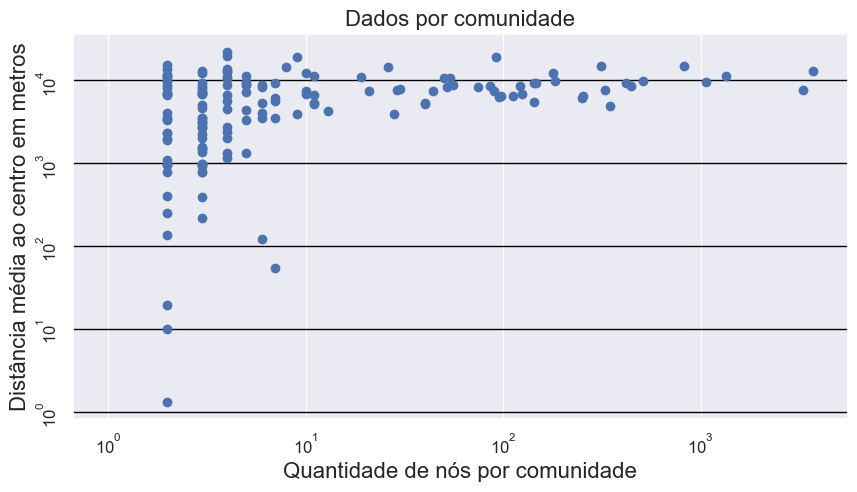

In [26]:
text_size_axis = 12
text_size_standart = 16

# Extract the keys and values from the 'estatisticas' dictionary
x = [len(sorted_estatisticas_grafo[key]['x_points']) for key in sorted_estatisticas_grafo.keys()]
y = [sorted_estatisticas_grafo[key]['mean_distance_to_center'] for key in sorted_estatisticas_grafo.keys()]

# Plot the values in bars, y-axis in log
plt.figure(figsize=(10, 5))
plt.scatter(x, y)
plt.xscale('log')
plt.yscale('log')
plt.xlabel('Quantidade de nós por comunidade', fontsize=text_size_standart)
plt.ylabel('Distância média ao centro em metros', fontsize=text_size_standart)
plt.title('Dados por comunidade', fontsize=text_size_standart)
plt.xticks(fontsize=text_size_axis)
plt.yticks(fontsize=text_size_axis, rotation=90)
plt.grid(axis='y', color='black')
plt.show()

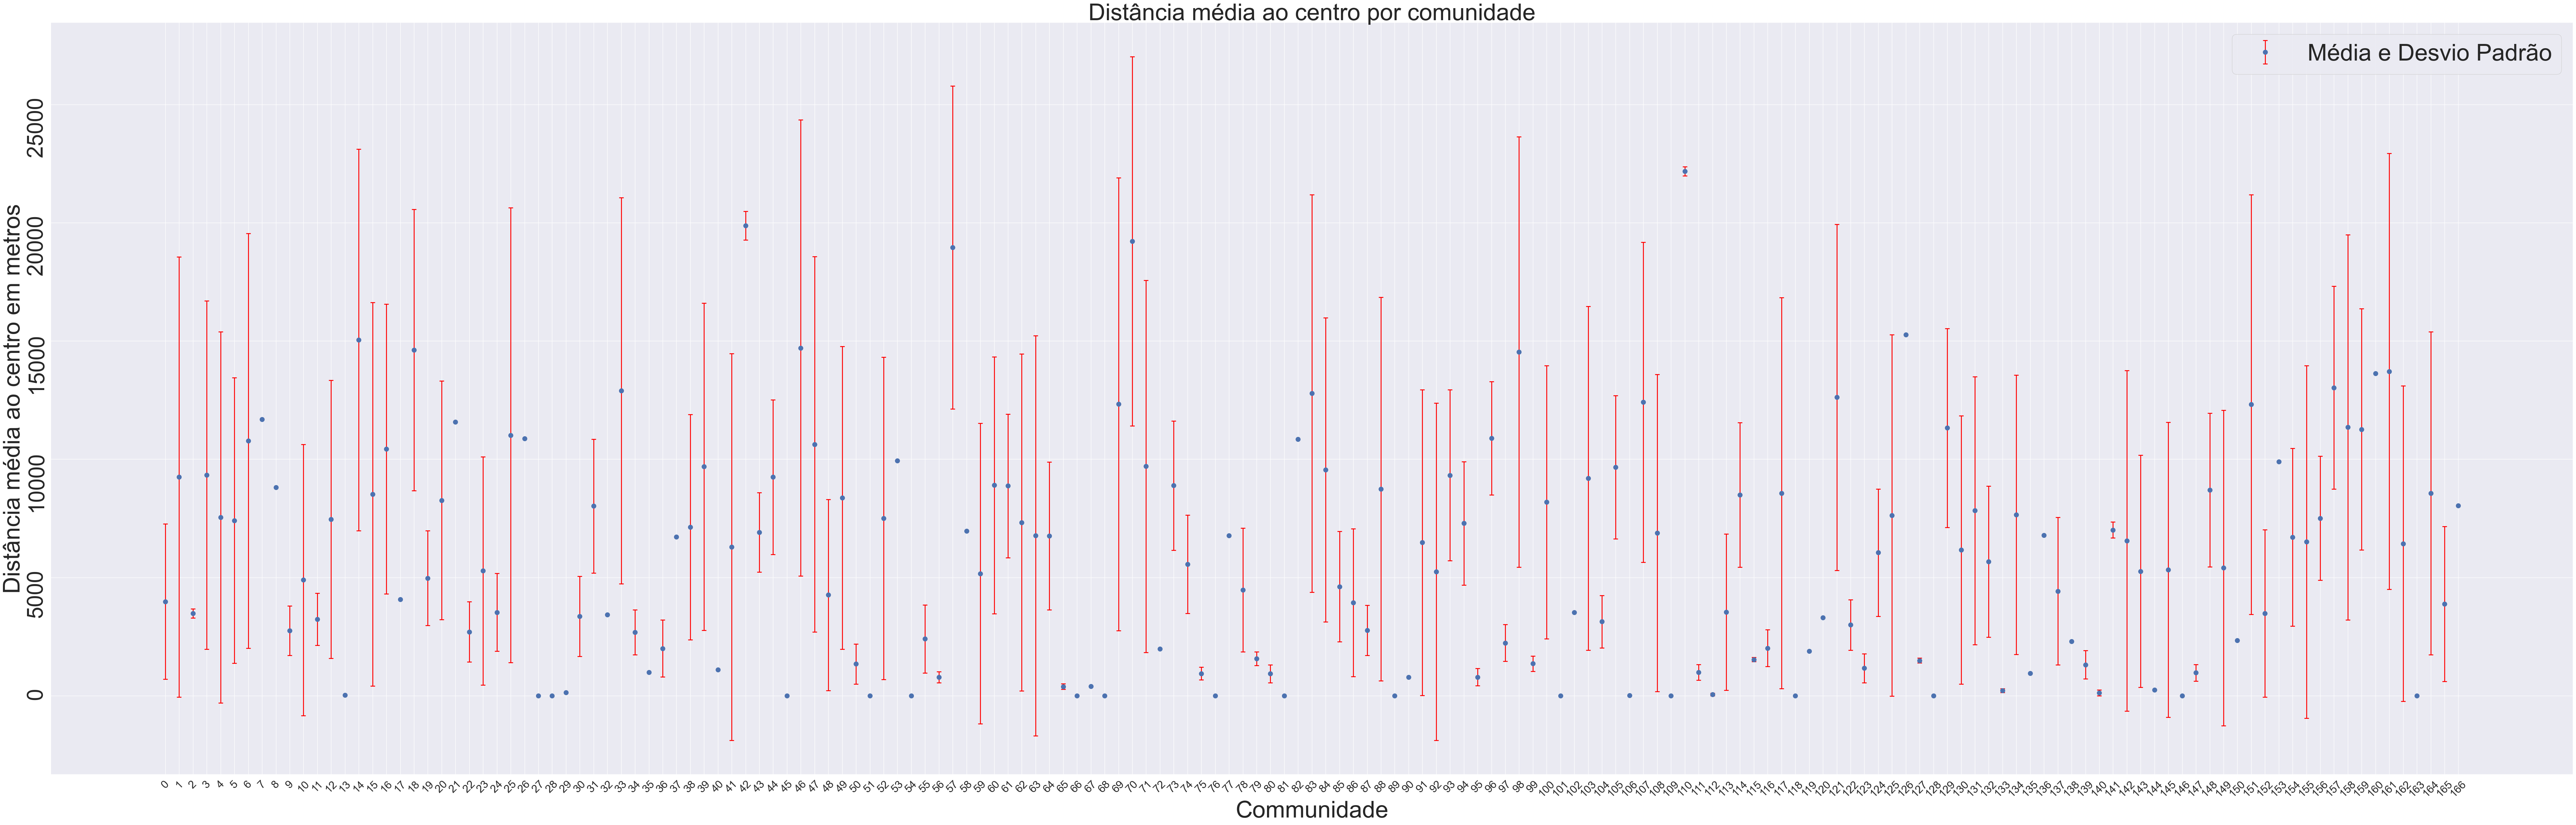

In [27]:
text_size_axis = 48
text_size_standart = 52

# Extract the mean and standard deviation from estatisticas
means = [sorted_estatisticas_grafo[key]['mean_distance_to_center'] for key in sorted_estatisticas_grafo.keys()]
stds = [sorted_estatisticas_grafo[key]['standard_deviation'] for key in sorted_estatisticas_grafo.keys()]

# Create a list of community names
community_names = [str(community) for community in sorted_estatisticas_grafo]

plt.figure(figsize=(100, 30))
# Plot the mean with error bars representing the standard deviation
plt.errorbar(community_names, means, yerr=stds, fmt='o', capsize=5, label='Média e Desvio Padrão', ecolor='red', elinewidth=2, capthick=2, markersize=10)

# Set the labels and title
plt.xlabel('Communidade', fontsize=text_size_standart)
plt.ylabel('Distância média ao centro em metros', fontsize=text_size_standart)
plt.xticks(fontsize=text_size_axis*.5)
plt.yticks(fontsize=text_size_axis, rotation=90)
plt.title('Distância média ao centro por comunidade', fontsize=text_size_standart)

# Rotate the x-axis labels for better visibility
plt.xticks(rotation=45)



plt.legend(fontsize=text_size_standart)  # Adiciona a legenda
plt.show()


#### Visualização

In [25]:
colors = ['#' + ''.join(random.choices('0123456789ABCDEF', k=6)) for _ in range(len(comunidades))]

for i, comunidade in enumerate(comunidades):
    for node in comunidade:
        grafo_twitter_conexo.nodes[node]['comunidade'] = i

In [26]:
nx.write_graphml_lxml(grafo_twitter_conexo, "D:\\Documentos\\data_and_code\\all_data_lisbon\\grafo_twitter_conexo.graphml")

In [32]:
for node in grafo_twitter_conexo.nodes():
    if node is None or node == '':
        print(node)

In [28]:
pos = nx.nx_agraph.graphviz_layout(grafo_twitter_conexo, prog="dot")

In [ ]:
nx.sub

In [27]:
agraph = to_agraph(grafo_twitter_conexo)

In [37]:
dot_graph = to_pydot(grafo_twitter_conexo)

C:\Users\Cliente\AppData\Local\Temp\ipykernel_14860\1227247907.py:1: DeprecationWarning: nx.nx_pydot.to_pydot depends on the pydot package, which has known issues and is not actively maintained.

See https://github.com/networkx/networkx/issues/5723
  dot_graph = to_pydot(grafo_twitter_conexo)


In [38]:
digraph = gv.Digraph()

for edge in tqdmBasic(dot_graph.get_edges(), total=len(dot_graph.get_edges())):
    source, target = edge.get_source(), edge.get_destination()
    digraph.edge(source, target)
    
for node in tqdmBasic(dot_graph.get_nodes(), total=len(dot_graph.get_nodes())):
    node_name = node.get_name()
    label = node.get_label()
    if label is not None:
        label = label.strip('"')  # Remover aspas do rótulo
        node_number = int(label.split()[0])  # Extrair o número do nó do rótulo
        color = grafo2.nodes[node_number]['color']
        digraph.node(node_name, label=label, style='filled', fillcolor=color)

100%|██████████| 76768/76768 [00:00<00:00, 362029.52it/s]


In [39]:
digraph.render('graph', format='png', cleanup=True)
plt.imshow(plt.imread('graph.png'))
plt.axis('off')
plt.show()

### Metodologia K-Means

#### Geração

In [8]:
# Get the attributes of each node
attributes = nx.get_node_attributes(grafo_twitter_conexo, 'median_X')
df = pd.DataFrame.from_dict(attributes, orient='index', columns=['median_X'])

# Add additional attributes
df['median_Y'] = nx.get_node_attributes(grafo_twitter_conexo, 'median_Y').values()

# Print the dataframe
print(df)


                           median_X            median_Y
wellbeingworld     486898.584786837  4285455.2597039575
jinxpt                485043.846088      4291182.477388
Rubenjpg         478838.34346469044   4286370.054438557
MiguelBalm            472340.213473      4283166.108894
MaraLunaAltmann       488568.667077      4285615.702928
...                             ...                 ...
fabrisluka            464428.770249      4286416.814863
joaorsgomes           477663.155815      4290612.982745
ParthOfYureai         490220.416972      4274840.180639
asciidisco            487332.087453      4286058.353744
CatePedroso           472061.444039      4285843.454422

[15714 rows x 2 columns]


In [28]:
kmeans = KMeans(n_clusters=167, init='k-means++')
df['comunidade_kMeans'] = kmeans.fit_predict(df[df.columns[0:2]])

#### Visualização

In [29]:
estatisticas_dataframe = calculate_geostatistics(df=df, column='comunidade_kMeans')

100%|██████████| 15714/15714 [00:00<00:00, 24858.32it/s]


In [30]:
myKeys = list(estatisticas_dataframe.keys())
myKeys.sort()
sorted_estatisticas_dataframe = {i: estatisticas_dataframe[i] for i in myKeys}

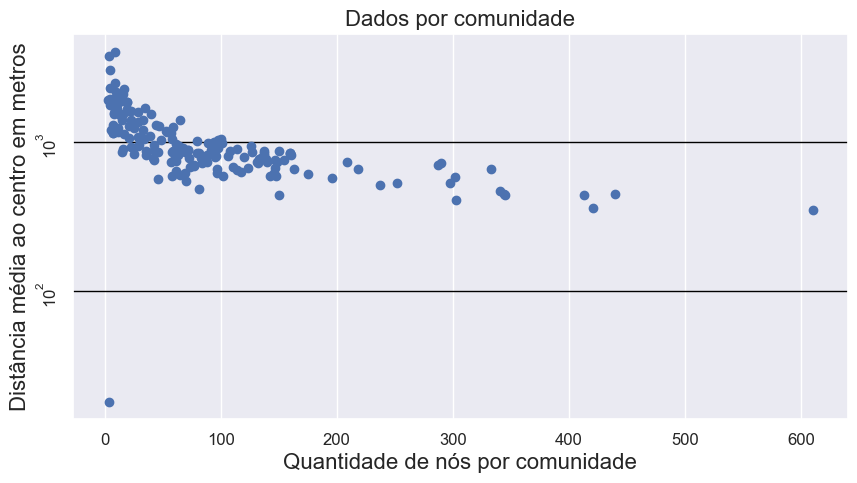

In [31]:
text_size_axis = 12
text_size_standart = 16

# Extract the keys and values from the 'estatisticas' dictionary
x = [len(sorted_estatisticas_dataframe[key]['x_points']) for key in sorted_estatisticas_dataframe.keys()]
y = [sorted_estatisticas_dataframe[key]['mean_distance_to_center'] for key in sorted_estatisticas_dataframe.keys()]

# Plot the values in bars, y-axis in log
plt.figure(figsize=(10, 5))
plt.scatter(x, y)
plt.yscale('log')
plt.xlabel('Quantidade de nós por comunidade', fontsize=text_size_standart)
plt.ylabel('Distância média ao centro em metros', fontsize=text_size_standart)
plt.title('Dados por comunidade', fontsize=text_size_standart)
plt.xticks(fontsize=text_size_axis)
plt.yticks(fontsize=text_size_axis, rotation=90)
plt.grid(axis='y', color='black')
plt.show()

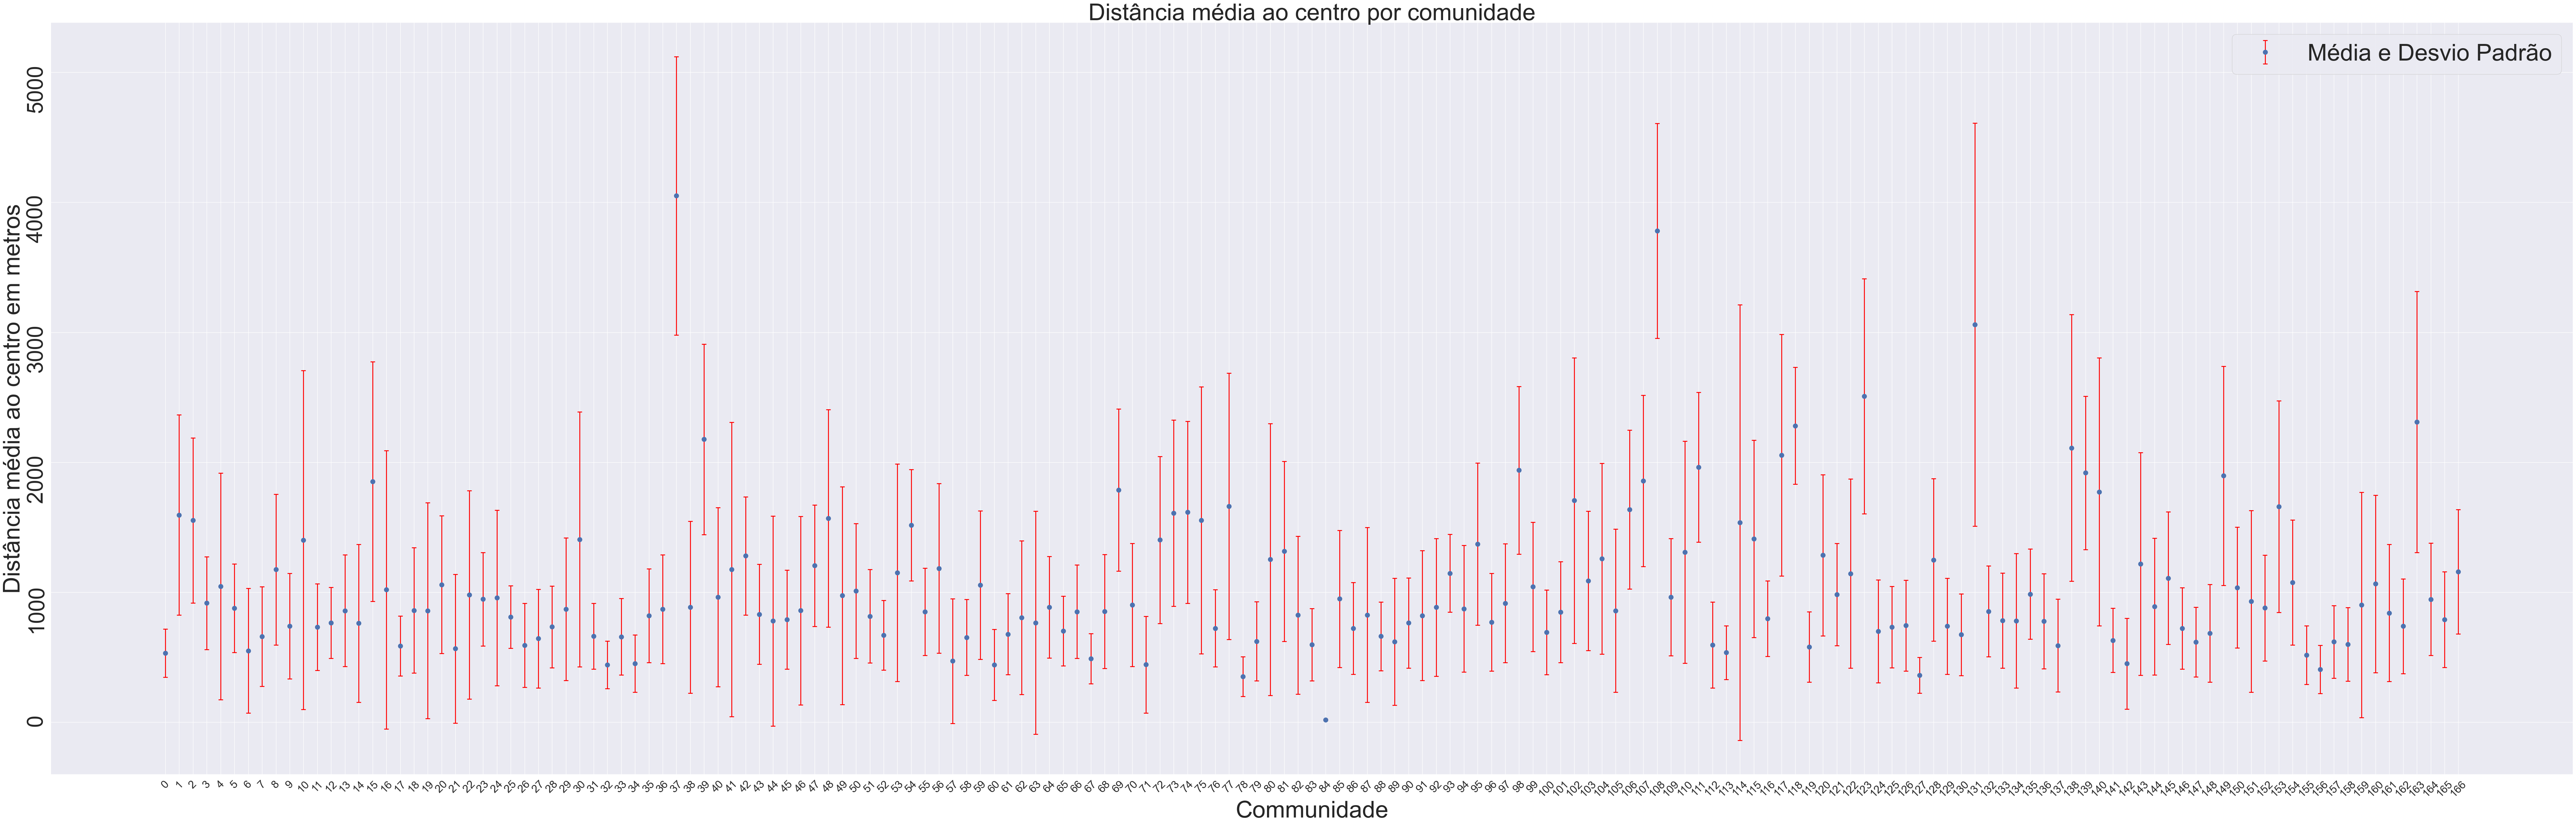

In [32]:
text_size_axis = 48
text_size_standart = 52

# Extract the mean and standard deviation from estatisticas
means = [sorted_estatisticas_dataframe[key]['mean_distance_to_center'] for key in sorted_estatisticas_dataframe.keys()]
stds = [sorted_estatisticas_dataframe[key]['standard_deviation'] for key in sorted_estatisticas_dataframe.keys()]

# Create a list of community names
community_names = [str(community) for community in sorted_estatisticas_dataframe]

plt.figure(figsize=(100, 30))
# Plot the mean with error bars representing the standard deviation
plt.errorbar(community_names, means, yerr=stds, fmt='o', capsize=5, label='Média e Desvio Padrão', ecolor='red', elinewidth=2, capthick=2, markersize=10)

# Set the labels and title
plt.xlabel('Communidade', fontsize=text_size_standart)
plt.ylabel('Distância média ao centro em metros', fontsize=text_size_standart)
plt.xticks(fontsize=text_size_axis*.5)
plt.yticks(fontsize=text_size_axis, rotation=90)
plt.title('Distância média ao centro por comunidade', fontsize=text_size_standart)

# Rotate the x-axis labels for better visibility
plt.xticks(rotation=45)



plt.legend(fontsize=text_size_standart)  # Adiciona a legenda
plt.show()

### Metodologia Affinity Propagation

#### Geração

In [15]:
affinity = AffinityPropagation(preference=0.5)
df['comunidade_affinity'] = affinity.fit_predict(df[df.columns[0:2]])

In [16]:
estatisticas_affinity = calculate_geostatistics(df=df, column='comunidade_affinity')

100%|██████████| 15714/15714 [00:01<00:00, 15710.45it/s]


In [17]:
myKeys = list(estatisticas_affinity.keys())
myKeys.sort()
sorted_estatisticas_affinity = {i: estatisticas_affinity[i] for i in myKeys}

#### Visualização

C:\Users\Cliente\AppData\Local\Temp\ipykernel_15232\3601829006.py:11: UserWarning: Data has no positive values, and therefore cannot be log-scaled.
  plt.yscale('log')


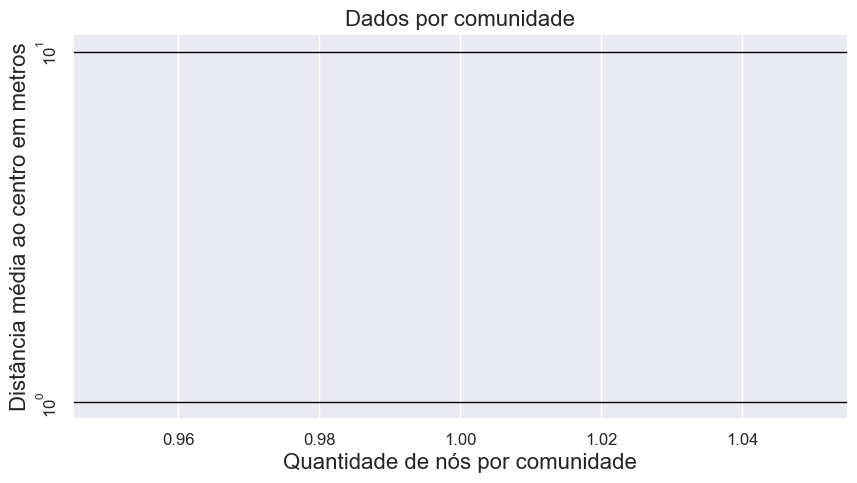

In [18]:
text_size_axis = 12
text_size_standart = 16

# Extract the keys and values from the 'estatisticas' dictionary
x = [len(sorted_estatisticas_affinity[key]['x_points']) for key in sorted_estatisticas_affinity.keys()]
y = [sorted_estatisticas_affinity[key]['mean_distance_to_center'] for key in sorted_estatisticas_affinity.keys()]

# Plot the values in bars, y-axis in log
plt.figure(figsize=(10, 5))
plt.scatter(x, y)
plt.yscale('log')
plt.xlabel('Quantidade de nós por comunidade', fontsize=text_size_standart)
plt.ylabel('Distância média ao centro em metros', fontsize=text_size_standart)
plt.title('Dados por comunidade', fontsize=text_size_standart)
plt.xticks(fontsize=text_size_axis)
plt.yticks(fontsize=text_size_axis, rotation=90)
plt.grid(axis='y', color='black')
plt.show()

In [33]:
agglomerative = AgglomerativeClustering(n_clusters=167, linkage='complete')
df['comunidade_aglo'] = agglomerative.fit_predict(df[df.columns[0:2]])

In [34]:
estatisticas_aglomerado = calculate_geostatistics(df=df, column='comunidade_aglo')

100%|██████████| 15714/15714 [00:00<00:00, 23876.03it/s]


In [35]:
myKeys = list(estatisticas_aglomerado.keys())
myKeys.sort()
sorted_estatisticas_aglomerado = {i: estatisticas_aglomerado[i] for i in myKeys}

## Visualização Geral

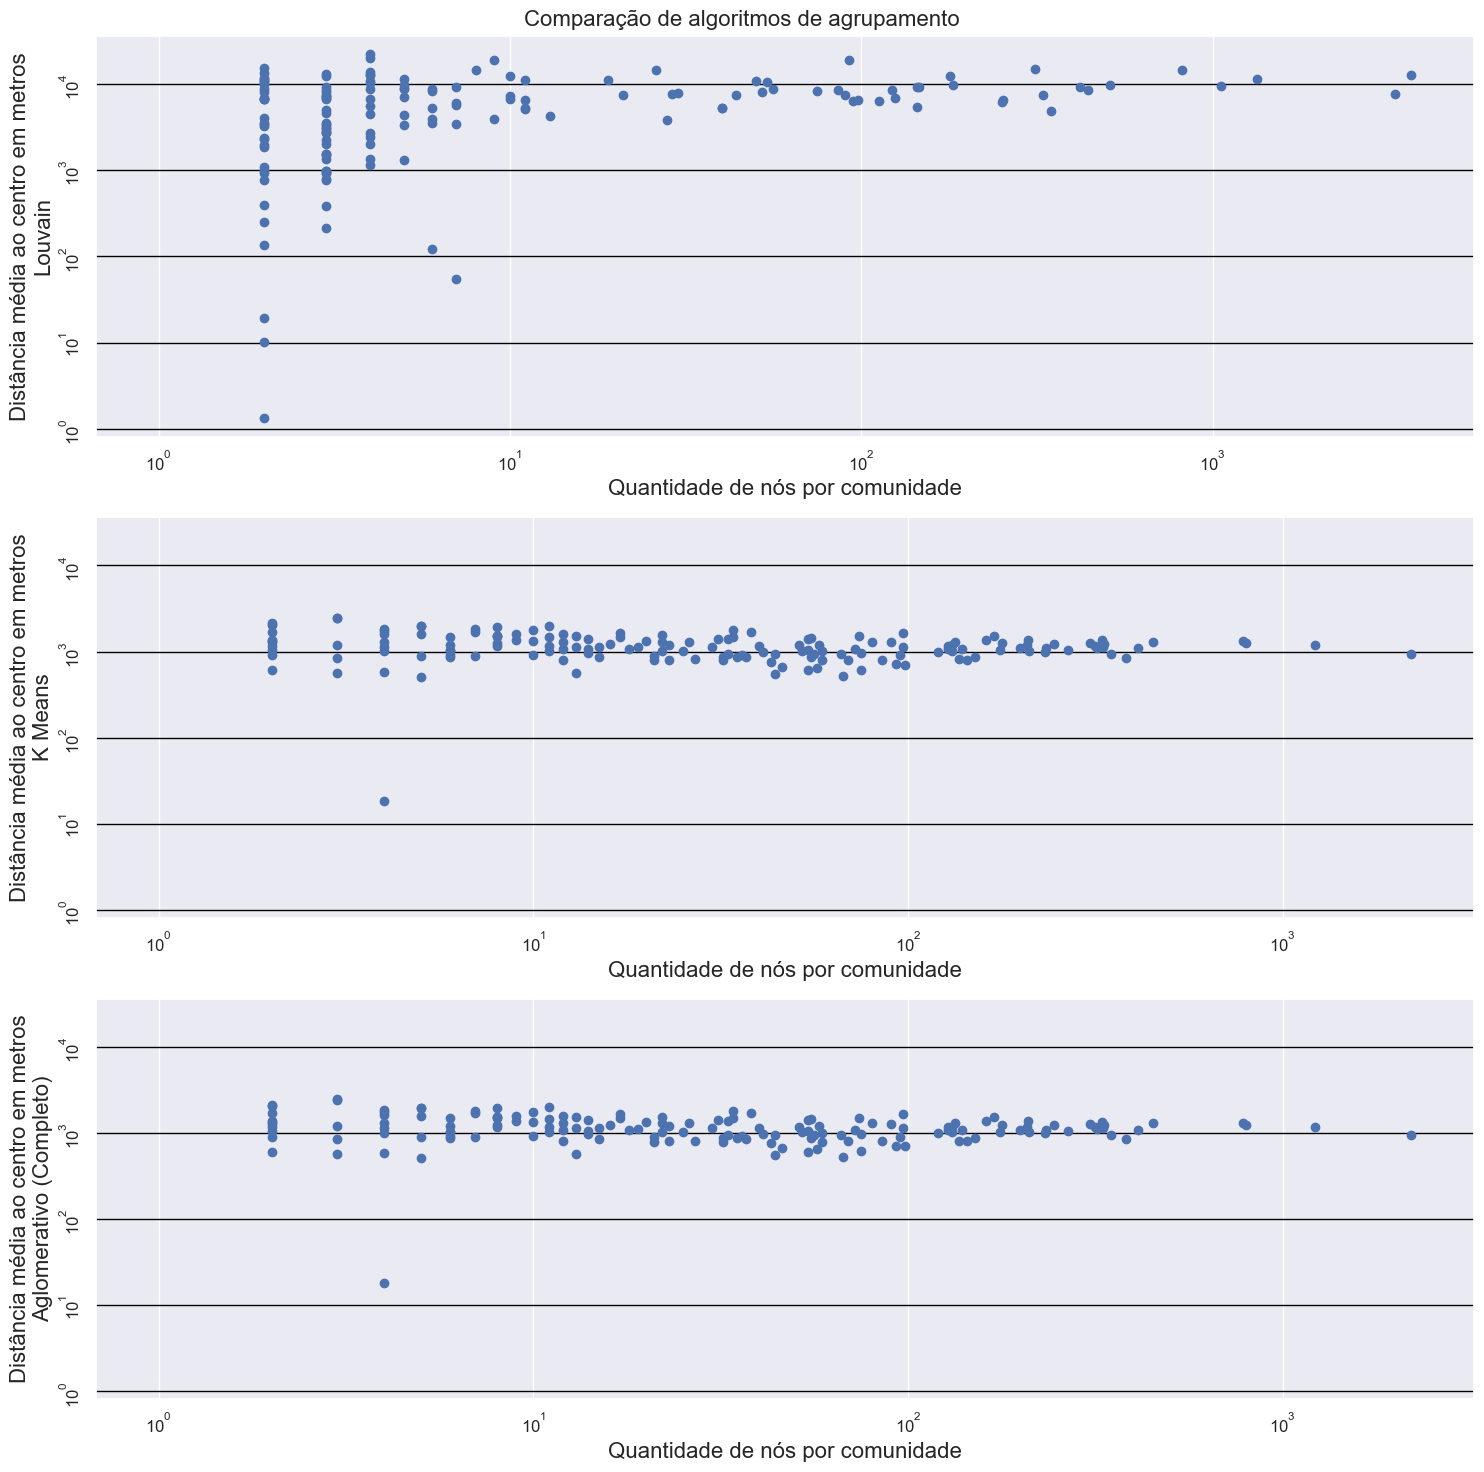

In [44]:
text_size_axis = 12
text_size_standart = 16

fig, axs = plt.subplots(3, figsize=(15, 15))

fig.suptitle('Comparação de algoritmos de agrupamento', fontsize=text_size_standart)



x = [len(sorted_estatisticas_grafo[key]['x_points']) for key in sorted_estatisticas_grafo.keys()]
y = [sorted_estatisticas_grafo[key]['mean_distance_to_center'] for key in sorted_estatisticas_grafo.keys()]

x2 = [len(sorted_estatisticas_dataframe[key]['x_points']) for key in sorted_estatisticas_dataframe.keys()]
y2 = [sorted_estatisticas_dataframe[key]['mean_distance_to_center'] for key in sorted_estatisticas_dataframe.keys()]

x2 = [len(sorted_estatisticas_aglomerado[key]['x_points']) for key in sorted_estatisticas_aglomerado.keys()]
y2 = [sorted_estatisticas_aglomerado[key]['mean_distance_to_center'] for key in sorted_estatisticas_aglomerado.keys()]

# Primeiro gráfico
axs[0].scatter(x, y)
axs[0].set_xscale('log')
axs[0].set_yscale('log')
axs[0].set_xlabel('Quantidade de nós por comunidade', fontsize=text_size_standart)
axs[0].set_ylabel('Distância média ao centro em metros\nLouvain', fontsize=text_size_standart)
axs[0].tick_params(axis='x', labelsize=text_size_axis)
axs[0].tick_params(axis='y', labelsize=text_size_axis, rotation=90)
axs[0].grid(axis='y', color='black')

# Segundo gráfico
axs[1].scatter(x2, y2)
axs[1].set_xscale('log')
axs[1].set_yscale('log')
axs[1].set_xlabel('Quantidade de nós por comunidade', fontsize=text_size_standart)
axs[1].set_ylabel('Distância média ao centro em metros\nK Means', fontsize=text_size_standart)
# axs[1].set_title('Dados por comunidade', fontsize=text_size_standart)
axs[1].tick_params(axis='x', labelsize=text_size_axis)
axs[1].tick_params(axis='y', labelsize=text_size_axis, rotation=90)
axs[1].grid(axis='y', color='black')
axs[1].set_ylim(axs[0].get_ylim())

# Terceiro gráfico
axs[2].scatter(x2, y2)
axs[2].set_xscale('log')
axs[2].set_yscale('log')
axs[2].set_xlabel('Quantidade de nós por comunidade', fontsize=text_size_standart)
axs[2].set_ylabel('Distância média ao centro em metros\nAglomerativo (Completo)', fontsize=text_size_standart)
# axs[2].set_title('Dados por comunidade', fontsize=text_size_standart)
axs[2].tick_params(axis='x', labelsize=text_size_axis)
axs[2].tick_params(axis='y', labelsize=text_size_axis, rotation=90)
axs[2].grid(axis='y', color='black')
axs[2].set_ylim(axs[0].get_ylim())

plt.tight_layout()
plt.show()

In [ ]:
fig2, axs2 = plt.subplots(2, figsize=(100, 100))

text_size_axis = 48
text_size_standart = 52

# Extract the mean and standard deviation from estatisticas
means_louvain = [sorted_estatisticas_grafo[key]['mean_distance_to_center'] for key in sorted_estatisticas_grafo.keys()]
stds_louvain = [sorted_estatisticas_grafo[key]['standard_deviation'] for key in sorted_estatisticas_grafo.keys()]

# Create a list of community names
community_names_louvain = [str(community) for community in sorted_estatisticas_grafo]

means_k_means = [sorted_estatisticas_dataframe[key]['mean_distance_to_center'] for key in sorted_estatisticas_dataframe.keys()]
stds_k_means = [sorted_estatisticas_dataframe[key]['standard_deviation'] for key in sorted_estatisticas_dataframe.keys()]

# Create a list of community names
community_names_k_means = [str(community) for community in sorted_estatisticas_dataframe]

labels_louvain = [label if i % 5 == 0 else '' for i, label in enumerate(community_names_louvain)]
labels_k_means = [label if i % 5 == 0 else '' for i, label in enumerate(community_names_k_means)]


axs2[0].errorbar(community_names_louvain, means_louvain, yerr=stds_louvain, fmt='o', capsize=5, label='Média e Desvio Padrão', ecolor='red', elinewidth=2, capthick=2, markersize=15)

# Set the labels and title
# axs2[0].set_xlabel('Communidade', fontsize=text_size_standart)
axs2[0].set_ylabel('Distância média ao centro em metros', fontsize=text_size_standart)
axs2[0].tick_params(axis='x', labelsize=text_size_axis, rotation=45)
axs2[0].tick_params(axis='y', labelsize=text_size_axis, rotation=90)
axs2[0].set_title('Distância média ao centro por comunidade', fontsize=text_size_standart)
axs2[0].set_xticks(range(len(community_names_louvain)))
axs2[0].set_xticklabels(labels_louvain, rotation=90)
axs2[0].grid(axis='y', color='black')
axs2[0].legend(fontsize=text_size_standart)

# Plot the mean with error bars representing the standard deviation
axs2[1].errorbar(community_names_k_means, means_k_means, yerr=stds_k_means, fmt='o', capsize=5, label='Média e Desvio Padrão', ecolor='red', elinewidth=2, capthick=2, markersize=15)

axs2[1].set_xlabel('Communidade', fontsize=text_size_standart)
axs2[1].set_ylabel('Distância média ao centro em metros', fontsize=text_size_standart)
axs2[1].tick_params(axis='x', labelsize=text_size_axis, rotation=45)
axs2[1].tick_params(axis='y', labelsize=text_size_axis, rotation=90)
axs2[1].set_xticks(range(len(community_names_k_means)))
axs2[1].set_xticklabels(labels_k_means, rotation=90)
# axs2[1].set_title('Distância média ao centro por comunidade', fontsize=text_size_standart)
axs2[1].grid(axis='y', color='black')
axs2[1].legend(fontsize=text_size_standart)
axs2[1].legend(fontsize=text_size_standart)  # Adiciona a legenda

plt.tight_layout()
plt.show()

In [23]:
df.to_csv('E://df.csv')

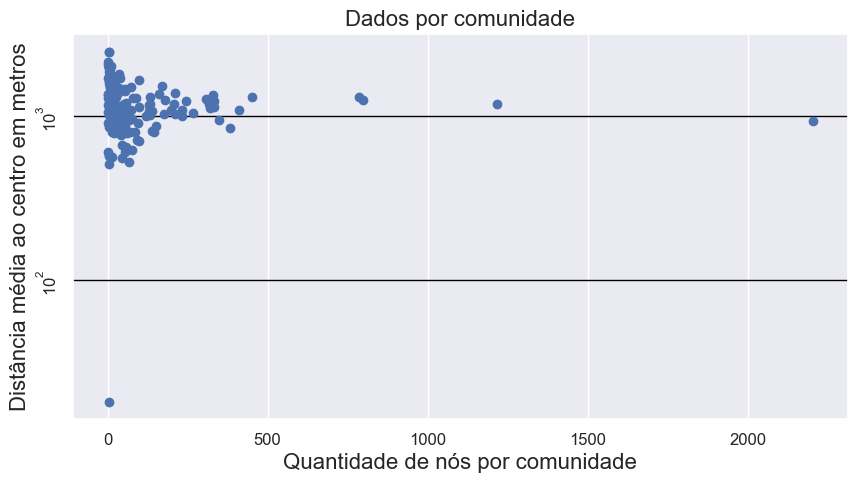

In [22]:
text_size_axis = 12
text_size_standart = 16

# Extract the keys and values from the 'estatisticas' dictionary
x = [len(estatisticas_aglomerado[key]['x_points']) for key in estatisticas_aglomerado.keys()]
y = [estatisticas_aglomerado[key]['mean_distance_to_center'] for key in estatisticas_aglomerado.keys()]

# Plot the values in bars, y-axis in log
plt.figure(figsize=(10, 5))
plt.scatter(x, y)
plt.yscale('log')
plt.xlabel('Quantidade de nós por comunidade', fontsize=text_size_standart)
plt.ylabel('Distância média ao centro em metros', fontsize=text_size_standart)
plt.title('Dados por comunidade', fontsize=text_size_standart)
plt.xticks(fontsize=text_size_axis)
plt.yticks(fontsize=text_size_axis, rotation=90)
plt.grid(axis='y', color='black')
plt.show()

# Fim

In [19]:
max_edge_secao = max(grafo_fluxo_secao.edges(data=True), key=lambda x: x[2].get('weight', 0))
max_edge_freguesia = max(grafo_fluxo_freguesia.edges(data=True), key=lambda x: x[2].get('weight', 0))
max_edge_municipio = max(grafo_fluxo_municipio.edges(data=True), key=lambda x: x[2].get('weight', 0))

print(f"Fluxo máximo entre seções: {max_edge_secao[0]} -> {max_edge_secao[1]} com {max_edge_secao[2]['weight']} tweets")
print(f"Fluxo máximo entre freguesias: {max_edge_freguesia[0]} -> {max_edge_freguesia[1]} com {max_edge_freguesia[2]['weight']} tweets")
print(f"Fluxo máximo entre municípios: {max_edge_municipio[0]} -> {max_edge_municipio[1]} com {max_edge_municipio[2]['weight']} tweets")



Fluxo máximo entre seções: 110657001 -> 110639025 com 19 tweets
Fluxo máximo entre freguesias: 111102 -> 111108 com 79 tweets
Fluxo máximo entre municípios: 1111 -> 1106 com 713 tweets
